## Importing Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score, r2_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

### import Dataset 

In [2]:
dataset = pd.read_csv('framingham.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### Find sum of missing values 

In [4]:
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Data Engineering
- handling missing value : 
    - most frequent 
    - mean 
    - median


In [5]:
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
#fill NAN with most frequent
imputer_most_frequent = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
dataset.education = imputer_most_frequent.fit_transform(dataset['education'].values.reshape(-1,1))[:,0]
dataset.cigsPerDay = imputer_most_frequent.fit_transform(dataset['cigsPerDay'].values.reshape(-1,1))[:,0]
dataset.BMI = imputer_most_frequent.fit_transform(dataset['BMI'].values.reshape(-1,1))[:,0]

In [7]:
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
#fill NAN with mean
imputer_mean = SimpleImputer(missing_values=np.NaN, strategy='mean')
dataset.BPMeds = imputer_mean.fit_transform(dataset['BPMeds'].values.reshape(-1,1))[:,0]
dataset.glucose = imputer_mean.fit_transform(dataset['glucose'].values.reshape(-1,1))[:,0]

In [9]:
#fill NAN with median
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
dataset.totChol = imputer.fit_transform(dataset['totChol'].values.reshape(-1,1))[:,0]

In [10]:
#Drop the one rows because it not worth to fill 
dataset.dropna(inplace=True)

## No Missing values 

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4237 non-null   int64  
 1   age              4237 non-null   int64  
 2   education        4237 non-null   float64
 3   currentSmoker    4237 non-null   int64  
 4   cigsPerDay       4237 non-null   float64
 5   BPMeds           4237 non-null   float64
 6   prevalentStroke  4237 non-null   int64  
 7   prevalentHyp     4237 non-null   int64  
 8   diabetes         4237 non-null   int64  
 9   totChol          4237 non-null   float64
 10  sysBP            4237 non-null   float64
 11  diaBP            4237 non-null   float64
 12  BMI              4237 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          4237 non-null   float64
 15  TenYearCHD       4237 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 562.7 KB


### Find the correlation between the target featuer with other features 

<AxesSubplot:>

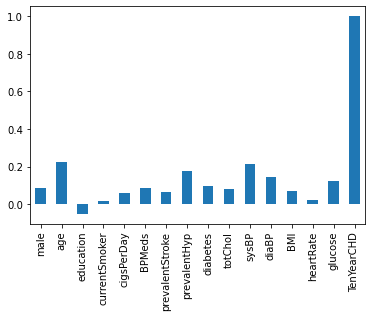

In [12]:
(dataset.corrwith(dataset['TenYearCHD'])).plot(kind='bar')

<AxesSubplot:>

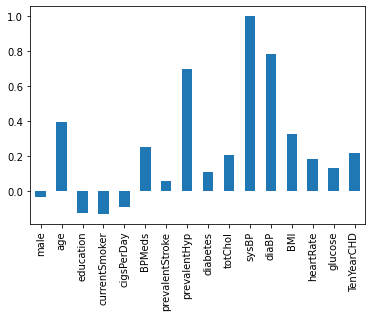

In [13]:
(dataset.corrwith(dataset['sysBP'])).plot(kind='bar')

## Exploratory Data Analysis (EDA)


<Figure size 1440x1440 with 0 Axes>

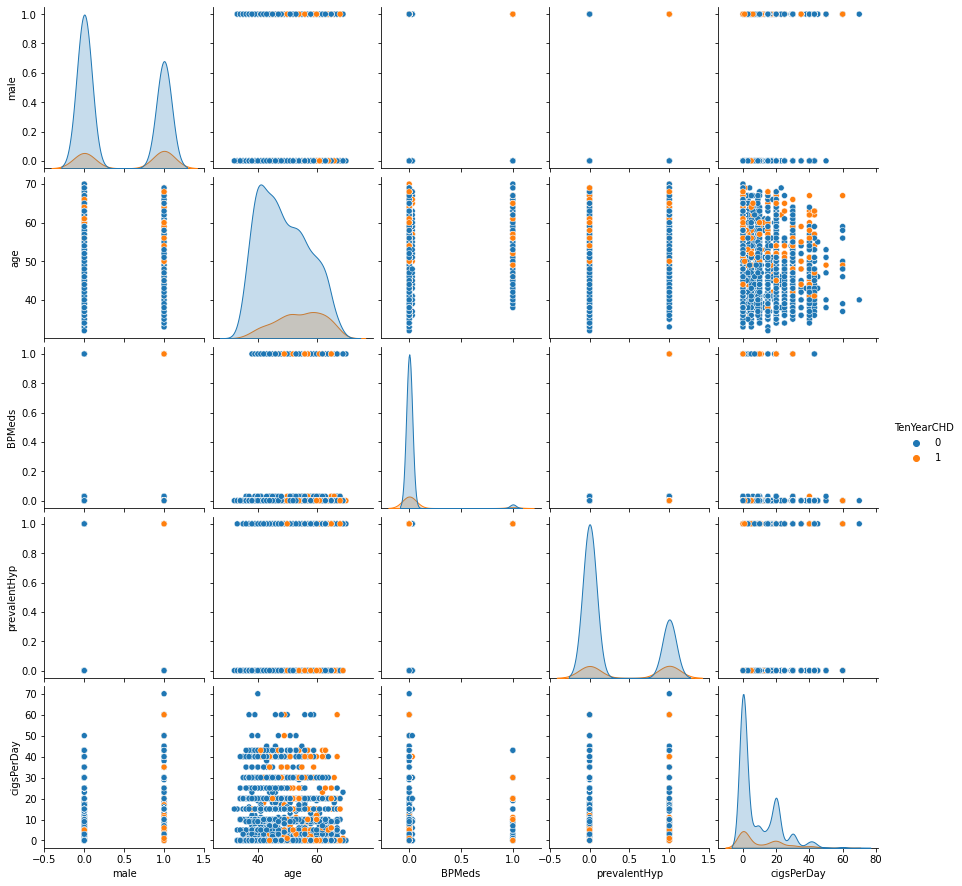

In [14]:
data1=dataset[['male', 'age', 'BPMeds', 'prevalentHyp', 'cigsPerDay', 'TenYearCHD']]
plt.figure(figsize=(20,20))
sns.pairplot(data1,hue='TenYearCHD')

<Figure size 1440x1440 with 0 Axes>

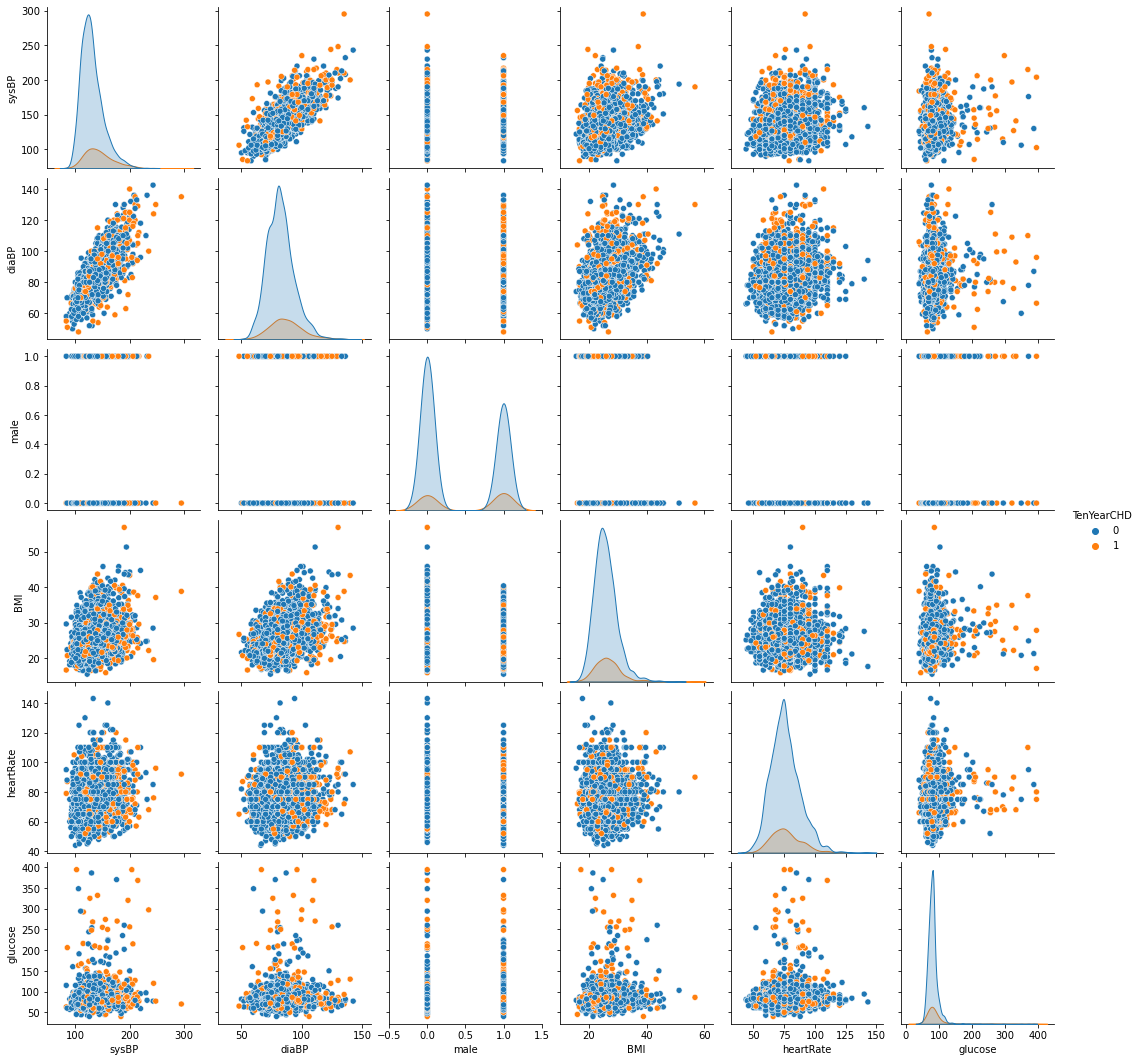

In [15]:
data3=dataset[['sysBP','diaBP', 'male','BMI', 'heartRate', 'glucose','TenYearCHD']]
plt.figure(figsize=(20,20))
sns.pairplot(data3,hue='TenYearCHD')

In [16]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029451,0.013557,0.197376,0.315494,-0.052165,-0.004526,0.004910,0.015755,-0.069453,-0.036505,0.058126,0.082482,-0.116620,0.005711,0.087856
age,-0.029451,1.000000,-0.164509,-0.214247,-0.192226,0.122091,0.057705,0.306785,0.101356,0.260355,0.393864,0.206447,0.133813,-0.012823,0.116735,0.224541
education,0.013557,-0.164509,1.000000,0.019631,0.010075,-0.010379,-0.032902,-0.078506,-0.038187,-0.023514,-0.125857,-0.062889,-0.138845,-0.049609,-0.034215,-0.052329
currentSmoker,0.197376,-0.214247,0.019631,1.000000,0.760201,-0.048596,-0.032973,-0.103655,-0.044262,-0.046378,-0.130732,-0.107607,-0.166224,0.062356,-0.054259,0.018907
cigsPerDay,0.315494,-0.192226,0.010075,0.760201,1.000000,-0.044798,-0.032232,-0.065335,-0.036124,-0.026907,-0.088743,-0.056575,-0.091269,0.073871,-0.056726,0.058477
BPMeds,-0.052165,0.122091,-0.010379,-0.048596,-0.044798,1.000000,0.115000,0.259374,0.051565,0.078759,0.252222,0.192473,0.098880,0.015175,0.048923,0.086930
prevalentStroke,-0.004526,0.057705,-0.032902,-0.032973,-0.032232,0.115000,1.000000,0.074876,0.006946,0.000115,0.057064,0.045181,0.019661,-0.017676,0.018063,0.061894
prevalentHyp,0.004910,0.306785,-0.078506,-0.103655,-0.065335,0.259374,0.074876,1.000000,0.077886,0.163240,0.696569,0.616178,0.299351,0.147261,0.082808,0.176935
diabetes,0.015755,0.101356,-0.038187,-0.044262,-0.036124,0.051565,0.006946,0.077886,1.000000,0.040103,0.111397,0.050307,0.084143,0.048994,0.605734,0.097472
totChol,-0.069453,0.260355,-0.023514,-0.046378,-0.026907,0.078759,0.000115,0.163240,0.040103,1.000000,0.207779,0.163838,0.115657,0.090532,0.044573,0.081844


# Multi-Linear Regression 

##### Choosing features and target

In [17]:
#feature set
X = dataset.drop(['sysBP'], axis=1)
#target set
y = dataset[['sysBP']]

##### Split data into train and test set

In [18]:
#Split the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   train_size=0.8, 
                                                   test_size=0.2,
                                                   random_state=42
                                                  )

In [19]:
# Check every variables using .shape
print('X_train = {}\ty_train = {}\tX_test = {}\ty_test = {}'
      .format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train = (3389, 15)	y_train = (3389, 1)	X_test = (848, 15)	y_test = (848, 1)


In [20]:
# creating pipeline for our model
pipe = make_pipeline(
    SimpleImputer(),
    MinMaxScaler(),
    LinearRegression()
)

In [21]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])

In [22]:
predict = pipe.predict(X_test)

In [23]:
print(f'Linear Regression score = {round(pipe.score(X_test, y_test), 3)}')

Linear Regression score = 0.733


# Logistic regression

In [24]:
#feature set
X = dataset.drop('TenYearCHD', axis=1)
#target set
y = dataset['TenYearCHD']

In [25]:
#Split the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, 
                                                    test_size=0.2, 
                                                    random_state=42)

##### Make pipline

In [26]:
#creating make pipeline for our model
MakePipeline = make_pipeline(
    StandardScaler(), #to scale the columns 
    LogisticRegression()) #the used model 

#fitting the training set
MakePipeline.fit(X_train,y_train)
#list of predicted y
y_pre=MakePipeline.predict(X_test)

In [27]:
print(f"Model Score: {round(MakePipeline.score(X_test, y_test), 3)}")

Model Score: 0.846


In [28]:
print(f"Model Score After Cross Validation: {round(cross_val_score(MakePipeline, X_train, y_train, cv=10).mean(),3)}")

Model Score After Cross Validation: 0.857


In [29]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       714
           1       0.62      0.06      0.11       134

    accuracy                           0.85       848
   macro avg       0.73      0.53      0.51       848
weighted avg       0.81      0.85      0.79       848



##### Pipline and GridSearch

In [30]:
#creating pipeline for our model
pipeline = Pipeline(steps=[
    ('Scaler', StandardScaler()),
    ('Classifier', LogisticRegression())
])
#fitting the training set
pipeline.fit(X_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Classifier', LogisticRegression())])

In [31]:
print(f"Model Score: {round(pipeline.score(X_test, y_test), 3)}")

Model Score: 0.846


In [32]:
#create hyperparameters to tune the model
GridShearch = {
    "Classifier__C": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], #regularization strength
    "Classifier__penalty": ['l1', 'l2'], #regularization method
    "Classifier__solver": ["liblinear","saga"], #Algorithm to use in the optimization problem.
    "Classifier__fit_intercept": [True,False] #false in fit intercept is forced to the origin (0, 0). true in fit intercept allowed to "fit" the y-axis
}
#apply the hyperparameters to the model
grid = GridSearchCV(pipeline, 
                    param_grid=GridShearch,
                    cv=10,
                    n_jobs=-1,
                    scoring="accuracy"
                   )
#fitting the training set
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('Classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'Classifier__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1.0],
                         'Classifier__fit_intercept': [True, False],
                         'Classifier__penalty': ['l1', 'l2'],
                         'Classifier__solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [33]:
print(f"Best Parameters: {grid.best_params_}")

Best Parameters: {'Classifier__C': 0.1, 'Classifier__fit_intercept': True, 'Classifier__penalty': 'l2', 'Classifier__solver': 'liblinear'}


In [34]:
print(f"Best Score: {round(grid.best_score_, 3)}") #best score

Best Score: 0.858


In [35]:
print(f"Best Score: {round(grid.best_score_, 3)}")
y_pre1 = grid.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pre1))

Best Score: 0.858
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       714
           1       0.62      0.06      0.11       134

    accuracy                           0.85       848
   macro avg       0.73      0.53      0.51       848
weighted avg       0.81      0.85      0.79       848



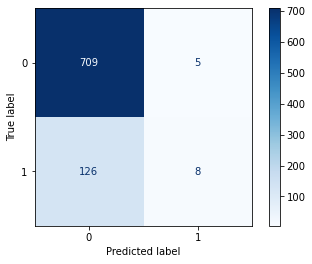

In [36]:
plot_confusion_matrix(grid, X=X_test, y_true=y_test, cmap='Blues')